# Notebook for reproduce the identification of streams in M31 using Pandas:
data @ /home/mardom/Astrophysical-Research/Andromeda-Gaia-DR2/data/pandas \\
code @ /home/mardom/Astrophysical-Research/Andromeda-Gaia-DR2/code/HSS    \\
following https://iopscience.iop.org/article/10.3847/1538-4357/aae8e7/pdf \\
and https://iohttps://iopscience.iop.org/article/10.3847/1538-4357/ac4496/pdf \\
in order to create a library of streams in M31 like those in the MW  and therefore 
contribute to https://github.com/mardom/galstreams.git upstream \\
need: cross correlation with Gaia data by Keiko and  \\
todo: \\
by Mariano Javier de Leon, Dominguez Romero @ IATE-OAC-UNC 2022, mariano.dominguez@unc.edu.ar \\

In [1]:
import regions
import HSS 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath="/media/mardom/_store/mardom/Astrophysical-Research/Andromeda-Gaia-DR2/data/pandas/CATALOGS/"

In [3]:
filename="m001p.ascd.gz"

In [4]:
datasource=filepath+filename

In [5]:
# read pandas fits data at  /home/mardom/Astrophysical-Research/Andromeda-Gaia-DR2/data/pandas
from astropy.io import ascii
data = ascii.read(datasource)  
print(data)                

     RA         Dec      iccd    xg      yg     g      dg   ig    xi      yi     i      di   ii  ia field
----------- ------------ ---- ------- ------- ------ ----- --- ------- ------- ------ ----- --- --- -----
1:40:16.989 +28:00:57.76    1  1336.4 2444.44  13.98 0.001  -9  1331.4 2446.13 13.617 0.001  -9   0     1
1:40:16.292 +27:59:37.16    1  1284.4 2881.92 13.987 0.001  -9 1279.02 2883.41 13.543 0.001  -9   0     1
1:40:22.707 +28:06:54.38    1  1759.3  499.18 14.142 0.001  -9 1755.99  501.99 13.751 0.001  -9   0     1
1:40:18.118 +28:01:38.52    1 1418.71 2222.32 14.157 0.001  -9  1413.9 2224.12 13.668 0.001  -9   0     1
1:40:18.067 +28:03:32.81    1 1418.15 1601.52 14.513 0.001  -9  1413.9 1603.56 13.821 0.001  -9   0     1
1:40:07.711 +28:04:29.12    1  674.08 1304.54  14.59 0.001  -9  670.26 1305.61 14.099 0.001  -9   0     1
1:40:04.072 +27:57:00.08    1  402.73 3740.64 14.683 0.001  -9  396.73 3740.72 14.016 0.001  -9   0     1
1:40:22.857 +28:06:50.88    1  1770.0  518.17 

In [6]:
data.colnames

['RA',
 'Dec',
 'iccd',
 'xg',
 'yg',
 'g',
 'dg',
 'ig',
 'xi',
 'yi',
 'i',
 'di',
 'ii',
 'ia',
 'field']

In [7]:
import glob
import pandas as pd
filepath = "/home/mardom/Astrophysical-Research/Andromeda-Gaia-DR2/data/pandas/CATALOGS/"

dfs = [ascii.read(x) for x in glob.glob(filepath + '*')]

In [8]:
from astropy.table import vstack
from astropy.table import Table
final = Table()
for i in dfs:
    final = vstack([final, i])
    print(i.info, final.info) 
#final_df=final.to_pandas
##final_df = pd.concat(dfs, axis=1, ignore_index=True)

<Table length=154881>
 name  dtype 
----- -------
   RA   str11
  Dec   str12
 iccd   int64
   xg float64
   yg float64
    g float64
   dg float64
   ig   int64
   xi float64
   yi float64
    i float64
   di float64
   ii   int64
   ia   int64
field   int64
 <Table length=154881>
 name  dtype 
----- -------
   RA   str11
  Dec   str12
 iccd   int64
   xg float64
   yg float64
    g float64
   dg float64
   ig   int64
   xi float64
   yi float64
    i float64
   di float64
   ii   int64
   ia   int64
field   int64

<Table length=224359>
 name  dtype 
----- -------
   RA   str11
  Dec   str12
 iccd   int64
   xg float64
   yg float64
    g float64
   dg float64
   ig   int64
   xi float64
   yi float64
    i float64
   di float64
   ii   int64
   ia   int64
field   int64
 <Table length=379240>
 name  dtype 
----- -------
   RA   str11
  Dec   str12
 iccd   int64
   xg float64
   yg float64
    g float64
   dg float64
   ig   int64
   xi float64
   yi float64
    i float64
   di float64

In [9]:
import pickle
with open('mypickle.pickle', 'wb') as f:
    pickle.dump(final, f)

In [10]:
# eliminate duplicates and mask erroneous determinations
condition =  np.logical_or(np.logical_or(final["ig"] == -1, final["ii"] == -1), np.logical_or(final["ig"] == -2, final["ii"] == -2))
stars = final[condition == True]
galax = final[condition == False]
del final

In [11]:
from astropy.coordinates import Angle
from astropy import units as u

RAV1 = Angle(galax["RA"], u.hour)
galax["RA"] = RAV1.wrap_at(12*u.hour)
galax["Dec"] = Angle(galax["Dec"], u.deg)

from astropy.table import unique
galax_nd = unique(galax, keys=['RA', 'Dec'])
galax_nd

with open('mypandasgalax.pickle', 'wb') as f:
    pickle.dump(galax_nd, f)

In [12]:
RAV2 = Angle(stars["RA"], u.hour)
stars["RA"] = RAV2.wrap_at(12*u.hour)
stars["Dec"] = Angle(stars["Dec"], u.deg)

stars_nd = unique(stars, keys=['RA', 'Dec'])
stars_nd

with open('mypandasstars.pickle', 'wb') as f:
    pickle.dump(stars_nd, f)

In [14]:
stars_nd

RA,Dec,iccd,xg,yg,g,dg,ig,xi,yi,i,di,ii,ia,field
hourangle,deg,,,,,,,,,,,,,
float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64
-0.2412544444444471,41.96785277777778,9,33.78,2901.58,24.986,0.068,-1,26.24,2887.23,24.339,0.115,-2,0,259
-0.2412544444444471,41.985480555555554,9,33.17,2557.19,24.335,0.04,1,25.71,2542.94,21.449,0.01,-1,0,259
-0.24125222222222575,42.02046111111111,9,33.16,1873.14,25.662,0.122,-1,25.87,1859.14,24.649,0.15,0,0,259
-0.24124777777778306,42.02375,9,33.45,1808.68,24.998,0.069,-1,26.18,1794.66,21.865,0.014,-1,0,259
-0.24124361111111625,41.93518611111111,9,36.21,3538.89,25.711,0.125,-1,28.51,3524.36,24.557,0.139,1,0,259
-0.2412283333333356,42.04515277777777,9,37.06,1389.56,26.132,0.181,-1,29.89,1375.71,25.597,0.328,1,0,259
-0.24122611111111425,42.00952777777778,9,38.65,2087.2,26.107,0.176,-1,31.31,2073.09,25.674,0.349,-1,0,259
-0.24121750000000475,41.791174999999996,18,31.99,1302.63,26.167,0.185,1,23.39,1287.55,24.984,0.196,-2,0,259


In [15]:
galax_nd

RA,Dec,iccd,xg,yg,g,dg,ig,xi,yi,i,di,ii,ia,field
hourangle,deg,,,,,,,,,,,,,
float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64
-0.24125638888889256,41.928355555555555,9,32.97,3671.98,24.845,0.06,1,25.24,3657.41,23.318,0.048,1,0,259
-0.24125638888889256,41.929249999999996,9,32.98,3654.59,25.309,0.089,0,25.25,3640.02,24.165,0.099,0,0,259
-0.2412544444444471,41.930363888888884,9,33.79,3632.79,20.359,0.003,0,26.07,3618.23,19.815,0.003,0,0,259
-0.2412544444444471,41.984658333333336,9,33.18,2573.34,25.429,0.099,1,25.72,2559.09,24.081,0.092,1,0,259
-0.2412544444444471,41.99908055555556,9,32.92,2291.44,24.776,0.057,0,25.53,2277.27,22.855,0.032,0,0,259
-0.24125222222222575,41.99831944444445,9,33.73,2306.27,22.304,0.009,0,26.34,2292.13,21.02,0.007,0,0,259
-0.24124777777778306,42.05500833333333,9,32.25,1196.23,23.233,0.017,0,25.12,1182.4,21.409,0.01,0,0,259
-0.24124361111111625,41.984411111111115,9,35.98,2578.2,25.384,0.096,1,28.52,2563.94,24.137,0.097,1,0,259


In [13]:
# Check color magnitude of both populations
# make cuts and apply Martin 2013 correction
# make radial density plots around M31 and M33 using stellar population 
# and spatial distributions of GCs and Satellites (Tables 3 and 4)


# Measuring galaxies shapes of galaxies should be possible to measure WL profile
# in the future but this needs propressing the images!

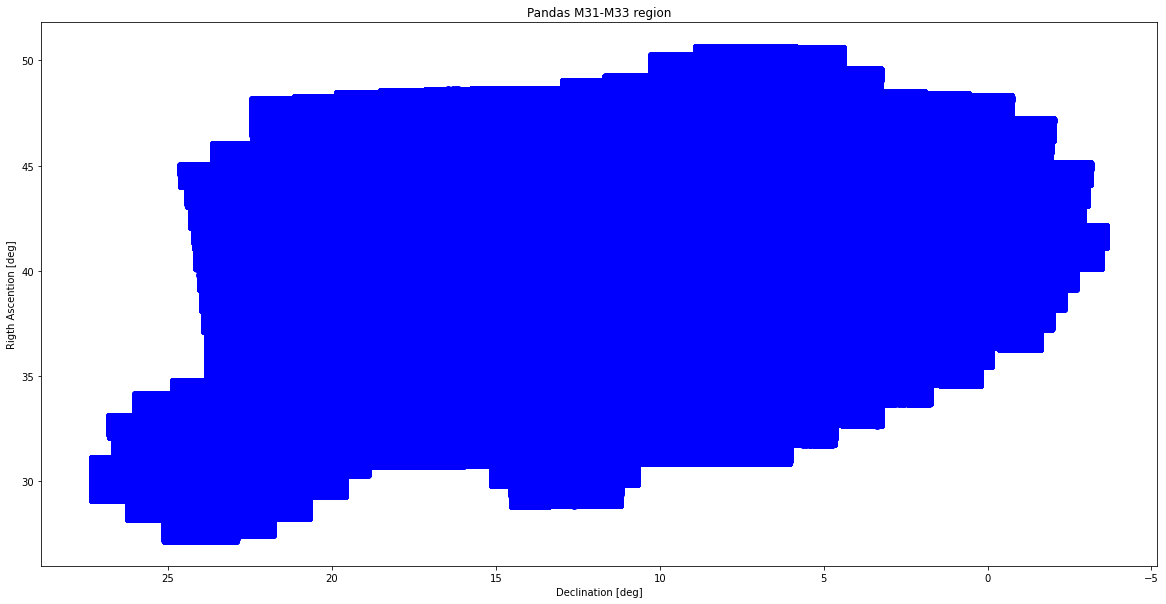

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(stars_nd["RA"]*15., stars_nd["Dec"], c ="blue")
# To show the plot
plt.title("Pandas M31-M33 region")
plt.gca().invert_xaxis()
plt.xlabel("Declination [deg]")
plt.ylabel("Rigth Ascention [deg]")
plt.show()

In [31]:
import seaborn as sns
stars_df=stars_nd.to_pandas()

In [27]:
stars_df.

<bound method Table.to_pandas of <Table length=42989079>
         RA                 Dec          iccd    xg      yg      g       dg     ig     xi      yi      i       di     ii    ia  field
     hourangle              deg                                                                                                      
      float64             float64       int64 float64 float64 float64 float64 int64 float64 float64 float64 float64 int64 int64 int64
-------------------- ------------------ ----- ------- ------- ------- ------- ----- ------- ------- ------- ------- ----- ----- -----
 -0.2412544444444471  41.96785277777778     9   33.78 2901.58  24.986   0.068    -1   26.24 2887.23  24.339   0.115    -2     0   259
 -0.2412544444444471 41.985480555555554     9   33.17 2557.19  24.335    0.04     1   25.71 2542.94  21.449    0.01    -1     0   259
-0.24125222222222575  42.02046111111111     9   33.16 1873.14  25.662   0.122    -1   25.87 1859.14  24.649    0.15     0     0   259
-0.24

In [ ]:
sns.kdeplot(
    data=stars_df, x=stars_df["RA"], y=stars_df["Dec"], fill=True
)

In [ ]:
import matplotlib.pyplot as plt
#importa matplotlib for reasons
%matplotlib inline
#image = plt.imread(image_data)
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [ ]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

In [ ]:
!more /media/mardom/_store/mardom/Astrophysical-Research/Andromeda-Gaia-DR2/data/pandas/files.txt

In [ ]:
print(type(image_data.flatten()))
print(image_data.flatten().shape)

In [ ]:
histogram = plt.hist(image_data.flatten(), bins='auto')

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())
#no
# I chose the tick (pulga) marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])